In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.dummy import DummyClassifier

In [6]:
def to_pickle(filename,objname):
    with open(filename, 'wb') as f:
        pickle.dump(objname, f)

In [7]:
def from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [8]:
X_df=from_pickle('Data files/predictors.p')
Y_df=from_pickle('Data files/target.p')

## K-nearest neighbors

Best results obtained for weights = uniform, neighbors = 7

In [9]:
knn_scores_uniform = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn_scores_uniform.append(sum(cross_val_score(clf, X_df, Y_df, cv=5))/5)

In [10]:
knn_scores_distance = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn_scores_distance.append(sum(cross_val_score(clf, X_df, Y_df, cv=5))/5)

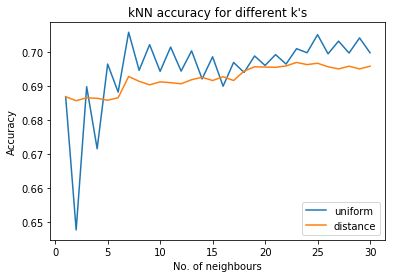

In [14]:
plt.plot(range(1,31),knn_scores_uniform, label='uniform');
plt.plot(range(1,31),knn_scores_distance, label = 'distance');
plt.xlabel("No. of neighbours")
plt.ylabel("Accuracy")
plt.title("kNN accuracy for different k's")
plt.legend();


## Logistic Regression

Best results obtained for c=1, penalty = l1

In [16]:
LR_l1_scores = []
l=[0.1,1,10,100,1000,10000]
for i in l:
    clf = LogisticRegression(n_jobs=-1,random_state=4444,penalty='l1',C=i)
    LR_l1_scores.append(np.mean(cross_val_score(clf, X_df,Y_df, cv=10)))

In [18]:
LR_l2_scores = []
l=[0.1,1,10,100,1000,10000]
for i in l:
    clf = LogisticRegression(n_jobs=-1,random_state=4444,penalty='l2',C=i)
    LR_l2_scores.append(np.mean(cross_val_score(clf, X_df,Y_df, cv=10)))

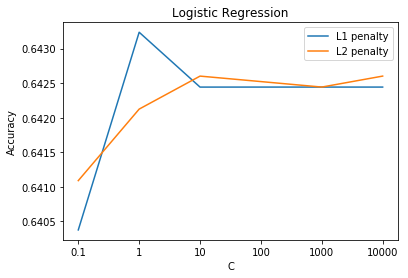

In [28]:
plt.plot(range(len(l)),LR_l1_scores, label='L1 penalty');
plt.plot(range(len(l)),LR_l2_scores, label = 'L2 penalty');
plt.xlabel("C")
plt.xticks(range(len(l)), l)
plt.ylabel("Accuracy")
plt.title("Logistic Regression")
plt.legend();

## Gaussian Naive Bayes

In [40]:
clf = GaussianNB()
np.mean(cross_val_score(clf, X_df,Y_df, cv=10))

0.58147694594148858

## Decision Tree
 
Best results obtained for criterion = gini, max_depth = 4

In [29]:
DT_gini = []
for i in range(2,12):
    clf = DecisionTreeClassifier(random_state=4444,max_depth=i,criterion='gini')
    DT_gini.append(np.mean(cross_val_score(clf, X_df,Y_df, cv=10)))

In [30]:
DT_entropy = []
for i in range(2,12):
    clf = DecisionTreeClassifier(random_state=4444,max_depth=i,criterion='entropy')
    DT_entropy.append(np.mean(cross_val_score(clf, X_df,Y_df, cv=10)))

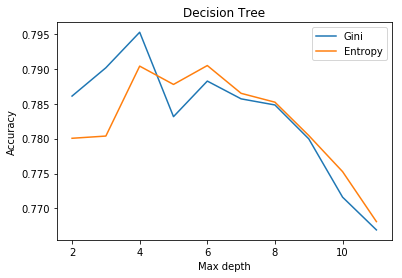

In [32]:
plt.plot(range(2,12),DT_gini, label='Gini');
plt.plot(range(2,12),DT_entropy, label = 'Entropy');
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree")
plt.legend();

## Random Forest Classifier

Best results obtained for criterion = gini, max_depth = 8, max_features = 7, max_trees =100 

In [36]:
max_tree=[10,100,500,750]
criteria=['gini','entropy']
max_f= range(1,8)
max_depth = range(2,12)
for i in max_tree:
    for j in criteria:
        for k in max_f:
            for l in max_depth:
                
                clf = RandomForestClassifier(random_state=4444,n_jobs=-1,criterion=j,n_estimators=i,max_depth=l,max_features=k)
                print "no. of trees=",i,"criteria=",j,"max_features=",k,"max_depth=",l,np.mean(cross_val_score(clf, X_df,Y_df, cv=10))



no. of trees= 10 criteria= gini max_features= 1 max_depth= 2 0.564549657739
no. of trees= 10 criteria= gini max_features= 1 max_depth= 3 0.589986749343
no. of trees= 10 criteria= gini max_features= 1 max_depth= 4 0.752550451388
no. of trees= 10 criteria= gini max_features= 1 max_depth= 5 0.685122993524
no. of trees= 10 criteria= gini max_features= 1 max_depth= 6 0.738560487007
no. of trees= 10 criteria= gini max_features= 1 max_depth= 7 0.76040435673
no. of trees= 10 criteria= gini max_features= 1 max_depth= 8 0.754450912855
no. of trees= 10 criteria= gini max_features= 1 max_depth= 9 0.760895206068
no. of trees= 10 criteria= gini max_features= 1 max_depth= 10 0.775599138865
no. of trees= 10 criteria= gini max_features= 1 max_depth= 11 0.766855979825
no. of trees= 10 criteria= gini max_features= 2 max_depth= 2 0.587760234506
no. of trees= 10 criteria= gini max_features= 2 max_depth= 3 0.640068799789
no. of trees= 10 criteria= gini max_features= 2 max_depth= 4 0.738157153933
no. of tree

no. of trees= 10 criteria= entropy max_features= 4 max_depth= 8 0.782746658427
no. of trees= 10 criteria= entropy max_features= 4 max_depth= 9 0.787123040283
no. of trees= 10 criteria= entropy max_features= 4 max_depth= 10 0.788077188712
no. of trees= 10 criteria= entropy max_features= 4 max_depth= 11 0.788712360898
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 2 0.772341701405
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 3 0.757405929495
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 4 0.792529712877
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 5 0.784895008919
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 6 0.788474708432
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 7 0.789350060629
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 8 0.789507653092
no. of trees= 10 criteria= entropy max_features= 5 max_depth= 9 0.791177665597
no. of trees= 10 criteria= entropy max_features= 5

no. of trees= 100 criteria= entropy max_features= 1 max_depth= 3 0.77250055764
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 4 0.775362623794
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 5 0.782595132074
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 6 0.784024079926
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 7 0.78823730872
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 8 0.790384900949
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 9 0.791497400104
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 10 0.790304082681
no. of trees= 100 criteria= entropy max_features= 1 max_depth= 11 0.790223390791
no. of trees= 100 criteria= entropy max_features= 2 max_depth= 2 0.771863995304
no. of trees= 100 criteria= entropy max_features= 2 max_depth= 3 0.775918115108
no. of trees= 100 criteria= entropy max_features= 2 max_depth= 4 0.784742597925
no. of trees= 100 criteria= entropy max_

no. of trees= 500 criteria= gini max_features= 4 max_depth= 6 0.794357444222
no. of trees= 500 criteria= gini max_features= 4 max_depth= 7 0.795628294103
no. of trees= 500 criteria= gini max_features= 4 max_depth= 8 0.795866578455
no. of trees= 500 criteria= gini max_features= 4 max_depth= 9 0.795945627441
no. of trees= 500 criteria= gini max_features= 4 max_depth= 10 0.795627662216
no. of trees= 500 criteria= gini max_features= 4 max_depth= 11 0.796423586296
no. of trees= 500 criteria= gini max_features= 5 max_depth= 2 0.788158638866
no. of trees= 500 criteria= gini max_features= 5 max_depth= 3 0.789509043242
no. of trees= 500 criteria= gini max_features= 5 max_depth= 4 0.790462180653
no. of trees= 500 criteria= gini max_features= 5 max_depth= 5 0.793164379554
no. of trees= 500 criteria= gini max_features= 5 max_depth= 6 0.795230648006
no. of trees= 500 criteria= gini max_features= 5 max_depth= 7 0.79618454368
no. of trees= 500 criteria= gini max_features= 5 max_depth= 8 0.79634302078

no. of trees= 500 criteria= entropy max_features= 7 max_depth= 9 0.79443497668
no. of trees= 500 criteria= entropy max_features= 7 max_depth= 10 0.795070780752
no. of trees= 500 criteria= entropy max_features= 7 max_depth= 11 0.79435567494
no. of trees= 750 criteria= gini max_features= 1 max_depth= 2 0.739274455425
no. of trees= 750 criteria= gini max_features= 1 max_depth= 3 0.771626721969
no. of trees= 750 criteria= gini max_features= 1 max_depth= 4 0.778938531989
no. of trees= 750 criteria= gini max_features= 1 max_depth= 5 0.784899052992
no. of trees= 750 criteria= gini max_features= 1 max_depth= 6 0.78855502119
no. of trees= 750 criteria= gini max_features= 1 max_depth= 7 0.789986370211
no. of trees= 750 criteria= gini max_features= 1 max_depth= 8 0.791735305324
no. of trees= 750 criteria= gini max_features= 1 max_depth= 9 0.793086088832
no. of trees= 750 criteria= gini max_features= 1 max_depth= 10 0.793402916661
no. of trees= 750 criteria= gini max_features= 1 max_depth= 11 0.79

no. of trees= 750 criteria= entropy max_features= 4 max_depth= 4 0.787840420887
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 5 0.789509169619
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 6 0.791019694003
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 7 0.792131687648
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 8 0.793642212032
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 9 0.793960177257
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 10 0.794197197837
no. of trees= 750 criteria= entropy max_features= 4 max_depth= 11 0.795549497871
no. of trees= 750 criteria= entropy max_features= 5 max_depth= 2 0.784900948651
no. of trees= 750 criteria= entropy max_features= 5 max_depth= 3 0.785854212439
no. of trees= 750 criteria= entropy max_features= 5 max_depth= 4 0.787602262911
no. of trees= 750 criteria= entropy max_features= 5 max_depth= 5 0.789589356
no. of trees= 750 criteria= entropy max_f

## ROC CURVES

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_df,Y_df, test_size=0.2, random_state=4444)

Random Forest
AUC: 0.900120997251
F1: 0.848016139879
Accuracy: 0.820349761526

Decision Tree
AUC: 0.878538915272
F1: 0.81981032666
Accuracy: 0.796104928458

kNN
AUC: 0.804364675415
F1: 0.763347763348
Accuracy: 0.739268680445

Logistic Regression
AUC: 0.711968681868
F1: 0.700261291527
Accuracy: 0.680842607313

Naive Bayes
('AUC:', 0.69441295350920651)
F1: 0.710526315789
Accuracy: 0.580286168521

Dummy Classifier
('AUC:', 0.49626389990100228)
F1: 0.53730246233
Accuracy: 0.49960254372


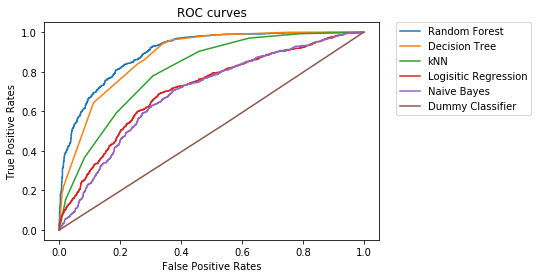

In [53]:
clf = RandomForestClassifier(random_state=4444,n_jobs=-1,criterion='gini',n_estimators=100,max_depth=8,max_features=7)
print "Random Forest"
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
print 'AUC:',auc(fpr, tpr)
class_pred = clf.predict(X_test)
print 'F1:',f1_score(y_test, class_pred)
print 'Accuracy:',accuracy_score(y_test, class_pred)
plt.plot(fpr, tpr,label = 'Random Forest');

clf = DecisionTreeClassifier(random_state=4444,max_depth=4,criterion='gini')
print "\nDecision Tree"
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
print 'AUC:',auc(fpr, tpr) 
class_pred = clf.predict(X_test)
print 'F1:',f1_score(y_test, class_pred)
print 'Accuracy:',accuracy_score(y_test, class_pred)
plt.plot(fpr, tpr,label = 'Decision Tree');

clf = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
print "\nkNN"
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
print 'AUC:',auc(fpr, tpr)
class_pred = clf.predict(X_test)
print 'F1:',f1_score(y_test, class_pred)
print 'Accuracy:',accuracy_score(y_test, class_pred)
plt.plot(fpr, tpr,label = 'kNN');

clf = LogisticRegression(n_jobs=-1,random_state=4444,penalty='l1',C=1)
print "\nLogistic Regression"
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
print 'AUC:',auc(fpr, tpr)
class_pred = clf.predict(X_test)
print 'F1:',f1_score(y_test, class_pred)
print 'Accuracy:',accuracy_score(y_test, class_pred)
plt.plot(fpr, tpr,label = 'Logisitic Regression');

clf = GaussianNB()
print "\nNaive Bayes"
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
print('AUC:',auc(fpr, tpr))
class_pred = clf.predict(X_test)
print 'F1:',f1_score(y_test, class_pred)
print 'Accuracy:',accuracy_score(y_test, class_pred)
plt.plot(fpr, tpr,label = 'Naive Bayes');

clf = DummyClassifier(random_state=4444)
print "\nDummy Classifier"
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
print('AUC:',auc(fpr, tpr))
class_pred = clf.predict(X_test)
print 'F1:',f1_score(y_test, class_pred)
print 'Accuracy:',accuracy_score(y_test, class_pred)
plt.plot(fpr, tpr,label = 'Dummy Classifier');

plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.title("ROC curves")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Best Model: random forest

In [48]:
clf = RandomForestClassifier(random_state=4444,n_jobs=-1,criterion='gini',n_estimators=100,max_depth=8,max_features=7)
print np.mean(cross_val_score(clf, X_df,Y_df, cv=10))
clf.fit(X_train, y_train);

0.795706837579


In [49]:
clf.feature_importances_

array([ 0.04206565,  0.75570971,  0.03021559,  0.00086489,  0.00333571,
        0.00562361,  0.00235289,  0.00257006,  0.00228171,  0.00301967,
        0.00271751,  0.00195658,  0.00179678,  0.00345896,  0.00107012,
        0.00454665,  0.00314171,  0.00223657,  0.00251164,  0.03454041,
        0.02439747,  0.00450066,  0.01771266,  0.01351626,  0.00504828,
        0.02880826])

In [50]:
importances = clf.feature_importances_
importances
imp_dic={}
for ind, imp in enumerate(importances):
    name = X_df.columns[ind]
    imp_dic[name]=imp

In [51]:
import operator
sorted_x = sorted(imp_dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_x

[('IntakeAge', 0.75570970772735746),
 ('Name', 0.042065652065268563),
 ('Intake Type_Owner Surrender', 0.034540406329112726),
 ('adoption_month', 0.03021558722234137),
 ('neutered', 0.028808259425315338),
 ('Intake Type_Stray', 0.024397469005611256),
 ('Intake Condition_Normal', 0.017712662311165375),
 ('Intake Condition_Nursing', 0.013516258464019376),
 ('black', 0.005623611875217609),
 ('Male', 0.0050482770376355001),
 ('Domestic_short', 0.0045466478004663104),
 ('Intake Condition_Injured', 0.0045006629966426624),
 ('Point', 0.0034589578507338643),
 ('white', 0.0033357140588573847),
 ('Domestic_med', 0.0031417083192852645),
 ('mix_color', 0.0030196727851549057),
 ('Tabby', 0.0027175102680414109),
 ('brown', 0.0025700600030075403),
 ('Siamese', 0.0025116425086010212),
 ('blue', 0.002352891343333983),
 ('orange', 0.0022817080512716318),
 ('Domestic_long', 0.0022365675671290053),
 ('Calico', 0.0019565768387691728),
 ('Tortie', 0.001796778865069802),
 ('Torbie', 0.0010701223367545853),
 

<img src="images/variable importance.png">